In [4]:
import librosa
import numpy as np
import mfcc 
import matplotlib.pyplot as plt

In [12]:
mel_filters = librosa.filters.mel(8000, 256, n_mels=26, norm=None)

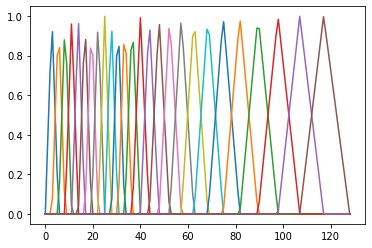

In [13]:
for i in range(26):
    plt.plot(mel_filters[i])
    

In [15]:
my_mel_filters = mfcc.get_mel_filters(8000, 256, n_mels=26, fmin=0.0, fmax=None)

In [16]:
my_mel_filters.shape

(26, 129)

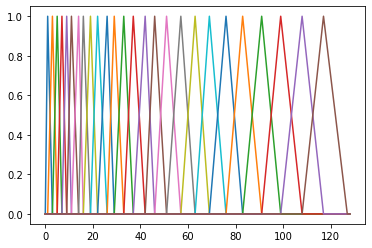

In [17]:
for i in range(26):
    plt.plot(my_mel_filters[i])

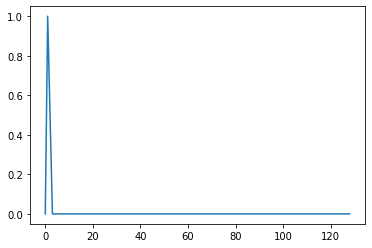

In [18]:
plt.plot(my_mel_filters[0])

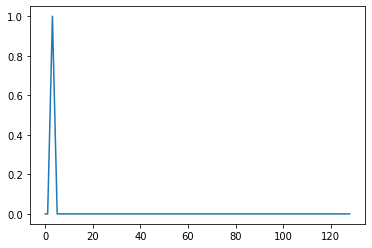

In [19]:
plt.plot(my_mel_filters[1])

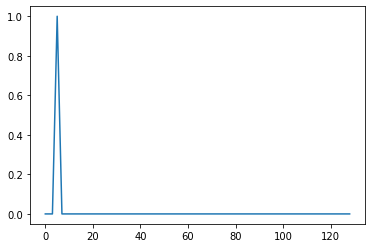

In [20]:
plt.plot(my_mel_filters[2])

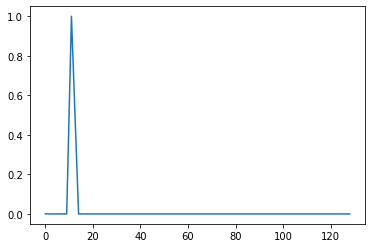

In [21]:
plt.plot(my_mel_filters[5])

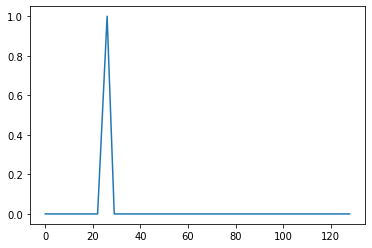

In [22]:
plt.plot(my_mel_filters[10])

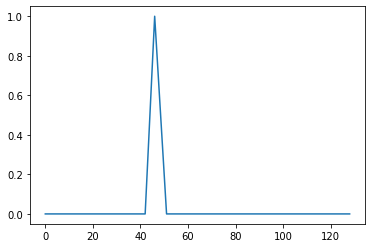

In [23]:
plt.plot(my_mel_filters[15])

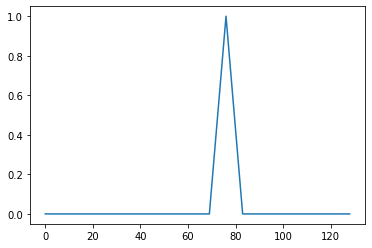

In [24]:
plt.plot(my_mel_filters[20])

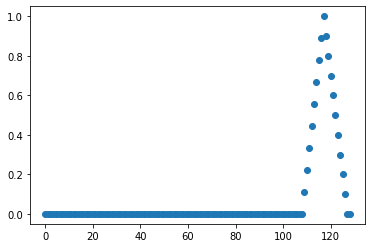

In [32]:
plt.plot(my_mel_filters[25], 'o')

In [29]:
np.sum(my_mel_filters[25]>0)

18

In [30]:
np.sum(my_mel_filters[24]>0)

17

In [31]:
np.sum(my_mel_filters[23]>0)

16

In [36]:
np.linspace(0, 1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [35]:
def find_first_nonzero_index(a):
    for i,v in enumerate(a):
        if v>0.0:
            return i
        

In [40]:
mel_filters_array = np.zeros((26, 18))
mel_filters_index = np.zeros((26, 2), dtype=np.int32)

In [41]:
for i in range(26):
    fil_len = np.sum(my_mel_filters[i]>0)
    fil_start = find_first_nonzero_index(my_mel_filters[i])
    
    mel_filters_array[i][0:fil_len] =  my_mel_filters[i][fil_start: fil_start+fil_len]
    mel_filters_index[i] = (fil_start, fil_len)

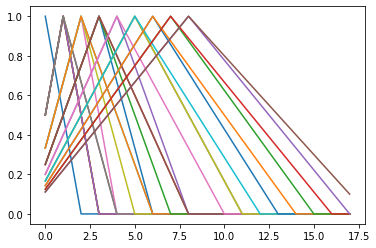

In [42]:
for i in range(26):
    plt.plot(mel_filters_array[i])

In [43]:
mel_filters_index

array([[  1,   2],
       [  2,   3],
       [  4,   3],
       [  6,   3],
       [  8,   3],
       [ 10,   4],
       [ 12,   4],
       [ 15,   4],
       [ 17,   5],
       [ 20,   6],
       [ 23,   6],
       [ 27,   6],
       [ 30,   7],
       [ 34,   8],
       [ 38,   8],
       [ 43,   8],
       [ 47,  10],
       [ 52,  11],
       [ 58,  11],
       [ 64,  12],
       [ 70,  13],
       [ 77,  14],
       [ 84,  15],
       [ 92,  16],
       [100,  17],
       [109,  18]])

In [44]:
W = {"mel_filter_banks_coes":(mel_filters_array, mel_filters_index)}

In [45]:
import sys
np.set_printoptions(threshold=sys.maxsize)

with open("mel_filter_banks_coes.txt", "w") as f:
    for key, value in W.items():
        if value:
            s1 = np.array2string(value[0], separator=', ')
            sp1 = ""
            for i in value[0].shape:
                sp1 = sp1+f"[{i}]"
            s2 = np.array2string(value[1], separator=', ')
            sp2 = ""
            for i in value[1].shape:
                sp2 = sp2+f"[{i}]"
                
            s1 = s1.replace("[", "{")
            s1 = s1.replace("]", "}")
            s2 = s2.replace("]", "}")
            s2 = s2.replace("[", "{")
            s = "float " + key+f"_W {sp1} = \n"+s1 +";\n\n\n" + "uint32 "+ key+f"_b {sp2} = \n" +s2+";\n\n\n"
       
            f.write(s)